- Artificial dataset
- Detection of outliers with isolation forest
    - parameters


- Train ml
    - Algorithm+outliers

In [ ]:
from matplotlib import pyplot as plt

from sklearn import metrics as m
from sklearn import datasets as dt
from sklearn import cluster as c


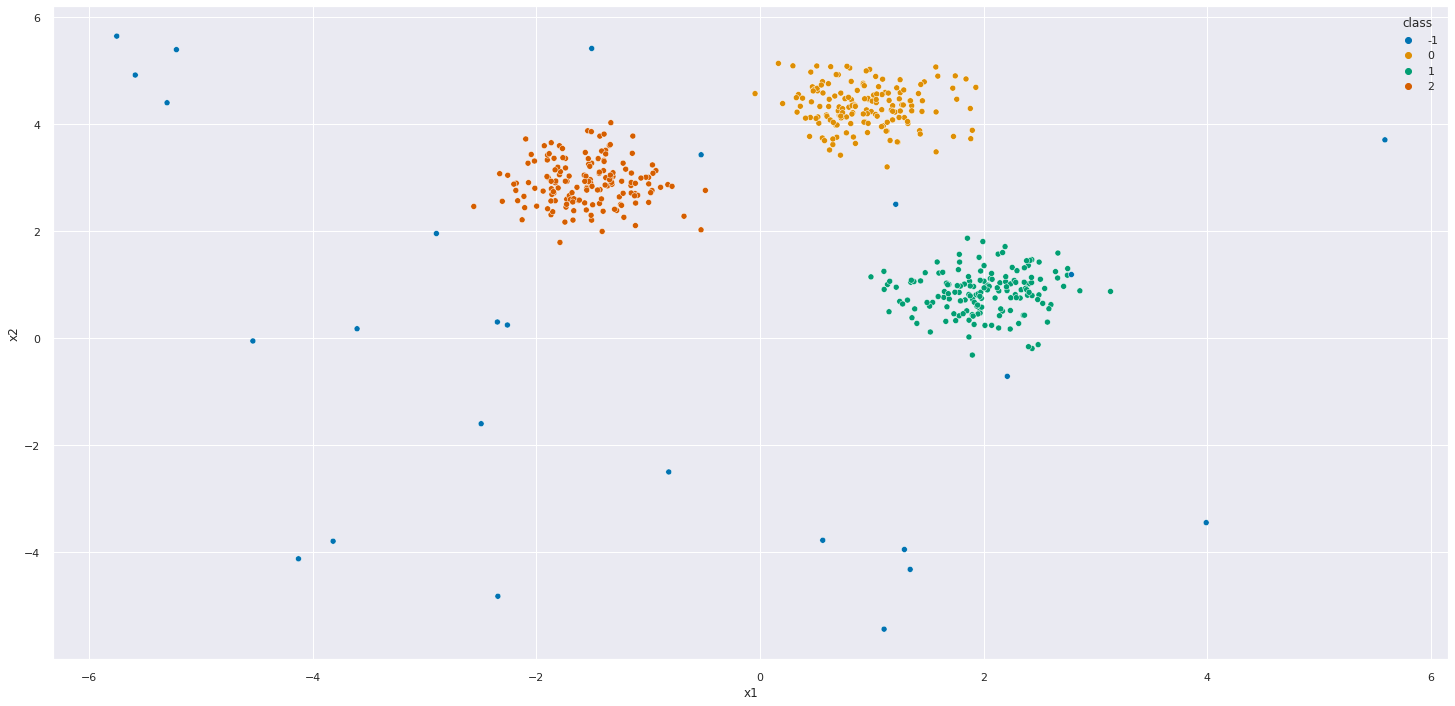

In [ ]:
n_samples = 500
outliers_fractions = 0.05
n_features=2
n_clusters = 3
n_outliers= int(outliers_fractions * n_samples)
n_inliers= n_samples - n_outliers
blobs_params=dict(random_state=0, n_samples=n_inliers, n_features=n_features )
X,y=dt.make_blobs(centers=n_clusters, cluster_std=0.4, **blobs_params )
df=pd.DataFrame(X, columns=['x' + str(i) for i in list(range(1, n_features+1))])
df['class']=y

rng=np.random.RandomState(42)
df_noise=pd.DataFrame(rng.uniform(low=-6,
                     high=6,
                     size=(n_outliers, n_features)), columns=['x' + str(i) for i in list(range(1, n_features+1))])
df_noise['class']=-1

df_raw=pd.concat([df, df_noise], axis=0)

sns.scatterplot(x='x1', y='x2', hue='class', palette='colorblind', data= df_raw);

In [ ]:
df.head()

,x1,x2,class
0,-1.831750,2.562770,2
1,0.969462,4.455448,0
2,1.252886,4.581687,0
3,0.593892,4.165395,0
4,1.185826,4.339156,0


/home/tc0019/anaconda3/envs/pa05env/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


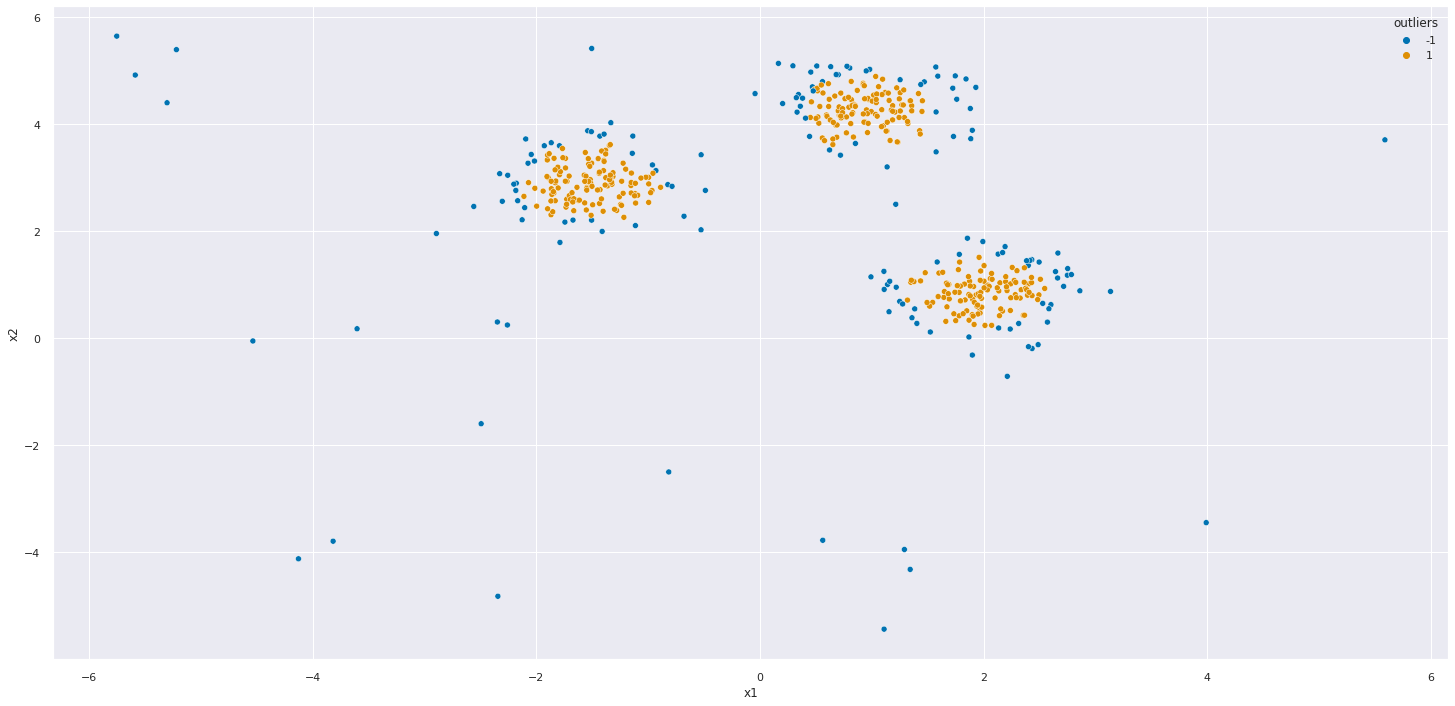

In [ ]:
# training isolation forest
X=df_raw.drop('class', axis=1)

# model definition
iso_model=en.IsolationForest(n_estimators=100, max_samples=300, bootstrap=True, contamination=0.30, random_state=rng, n_jobs=-1)


# predict
preds = iso_model.fit_predict(X)

# pred_scores=-1*iso_model.score_samples(X)

# performance
X['outliers']=preds

sns.scatterplot(x='x1', y='x2', hue='outliers', palette='colorblind', data= X);

In [ ]:
X.head()

,x1,x2,outliers
0,-1.831750,2.562770,1
1,0.969462,4.455448,1
2,1.252886,4.581687,1
3,0.593892,4.165395,1
4,1.185826,4.339156,1


/tmp/ipykernel_28900/4077666657.py:13: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(label='IsolationForestScore');


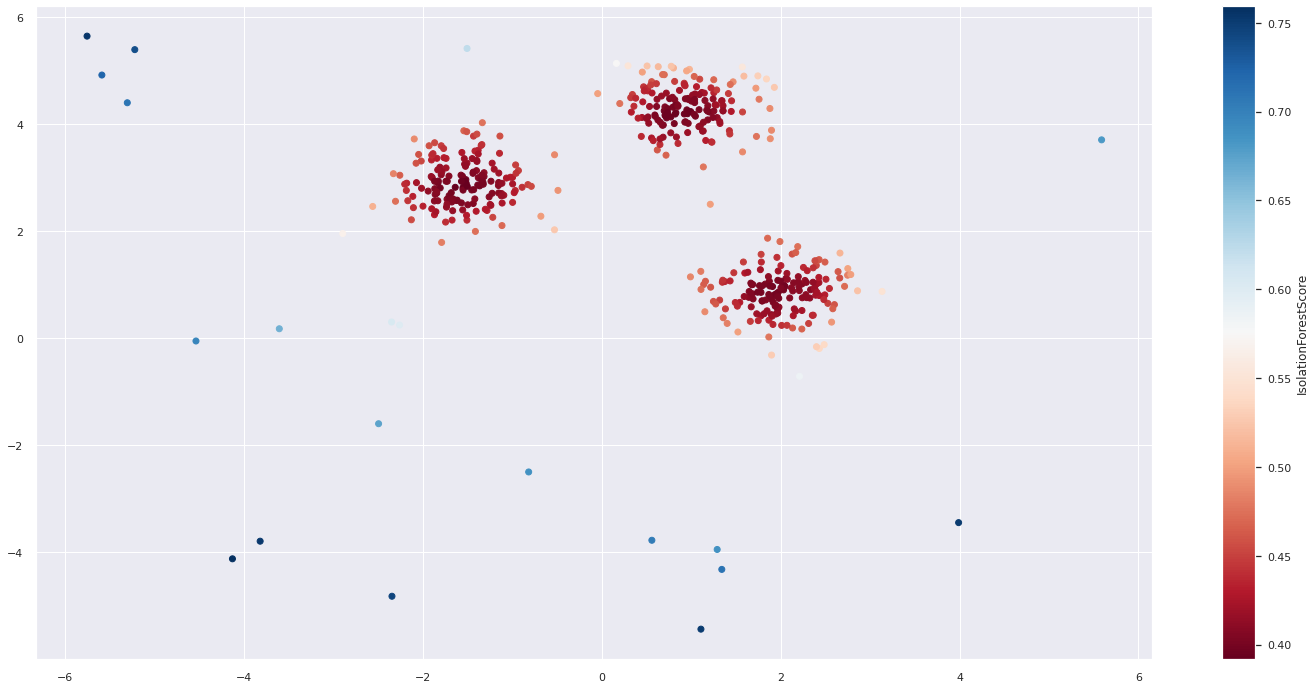

In [ ]:
# training isolation forest
X=df_raw.drop('class', axis=1)

# model definition
iso_model=en.IsolationForest(n_estimators=100,  n_jobs=-1)

iso_model.fit(X)
pred_scores=-1*iso_model.score_samples(X)

# performance
df_raw['outliers']=pred_scores
plt.scatter(df_raw['x1'], df_raw['x2'], c=df_raw['outliers'], cmap='RdBu' );
plt.colorbar(label='IsolationForestScore');

# Removing Outliers

In [ ]:
df_raw['outlier_flag']=df_raw['outliers'].apply(lambda x: 1 if x > 0.55 else 0)

df_raw=df_raw.query('outlier_flag == 0')
df_raw.head()

,x1,x2,class,outliers,outlier_flag
0,-1.831750,2.562770,2,0.409430,0
1,0.969462,4.455448,0,0.408038,0
2,1.252886,4.581687,0,0.433700,0
3,0.593892,4.165395,0,0.401297,0
4,1.185826,4.339156,0,0.408202,0


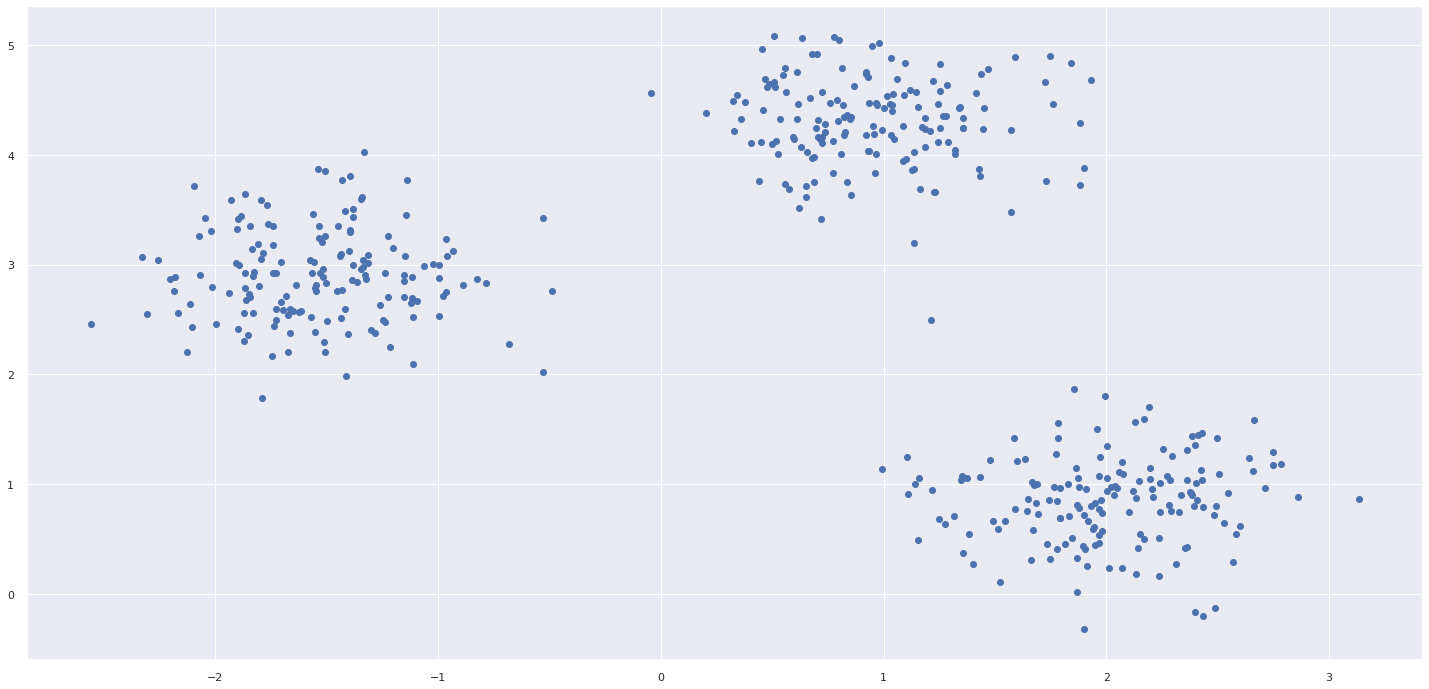

In [ ]:
plt.scatter(df_raw.x1, df_raw.x2,cmap='RdBu' )

# Tuning model

In [ ]:
k=8

# dataset
X = df_raw[['x1','x2']]

# model definition and fit
kmeans_model=c.KMeans(n_clusters=k).fit(X)

#pred
labels = kmeans_model.predict(X)
df_raw['labels']= labels
df_raw.head()

,x1,x2,class,outliers,outlier_flag,labels
0,-1.831750,2.562770,2,0.409430,0,0
1,0.969462,4.455448,0,0.408038,0,3
2,1.252886,4.581687,0,0.433700,0,7
3,0.593892,4.165395,0,0.401297,0,2
4,1.185826,4.339156,0,0.408202,0,7


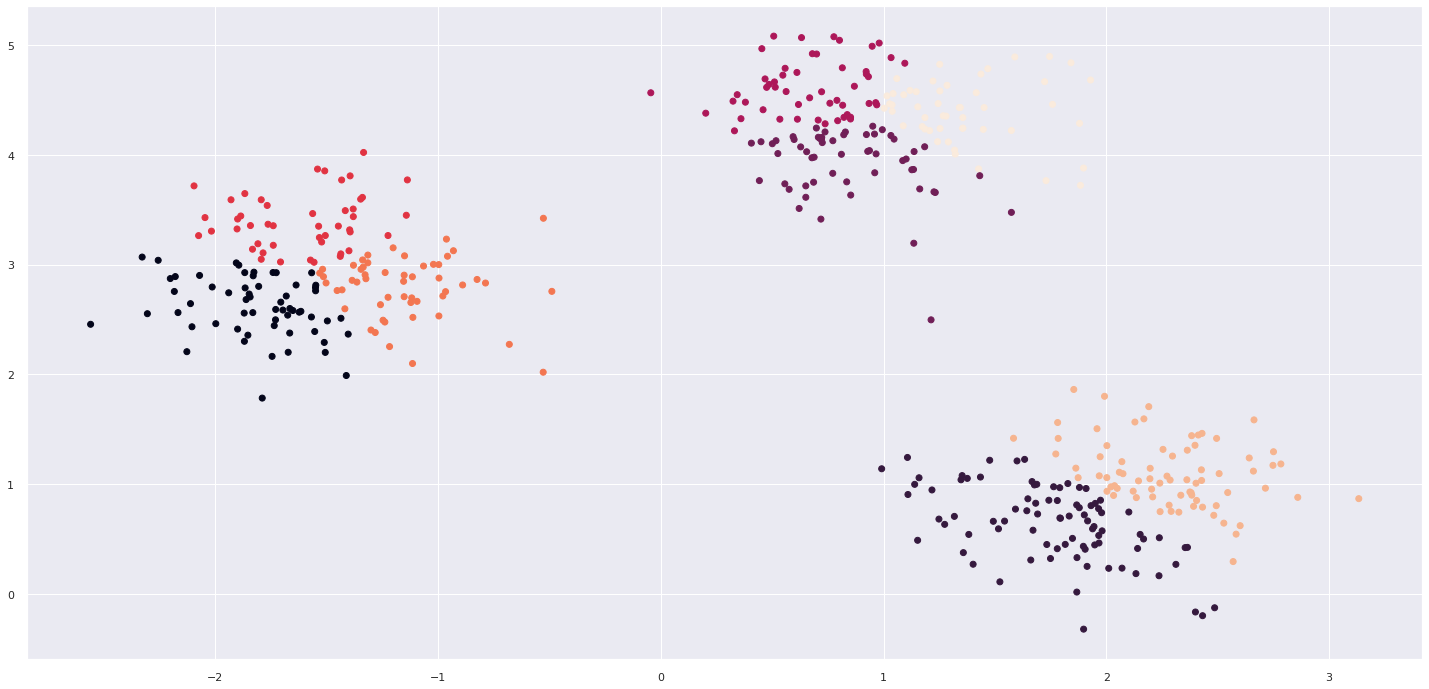

In [ ]:
plt.scatter(df_raw['x1'], df_raw['x2'], c=df_raw['labels'], cmap='rocket' );

In [ ]:
silhouette_list = []
davies_list = []

clusters=list(range(2,9))
for k in clusters:
    # model definition
    kmeans_model=c.KMeans(n_clusters=k)

    # model Training
    kmeans_model.fit(X)

    # model predict
    labels=kmeans_model.predict(X)

    # model performance
    sil = m.silhouette_score (X, labels)
    dav = m.davies_bouldin_score(X, labels)

    silhouette_list.append(sil)
    davies_list.append(dav)
    print(sil)

0.6241834458553831
0.7698716918145505
0.615729956818415
0.4653040844866803
0.32366206053673496
0.3395491821319164
0.34653247970334894


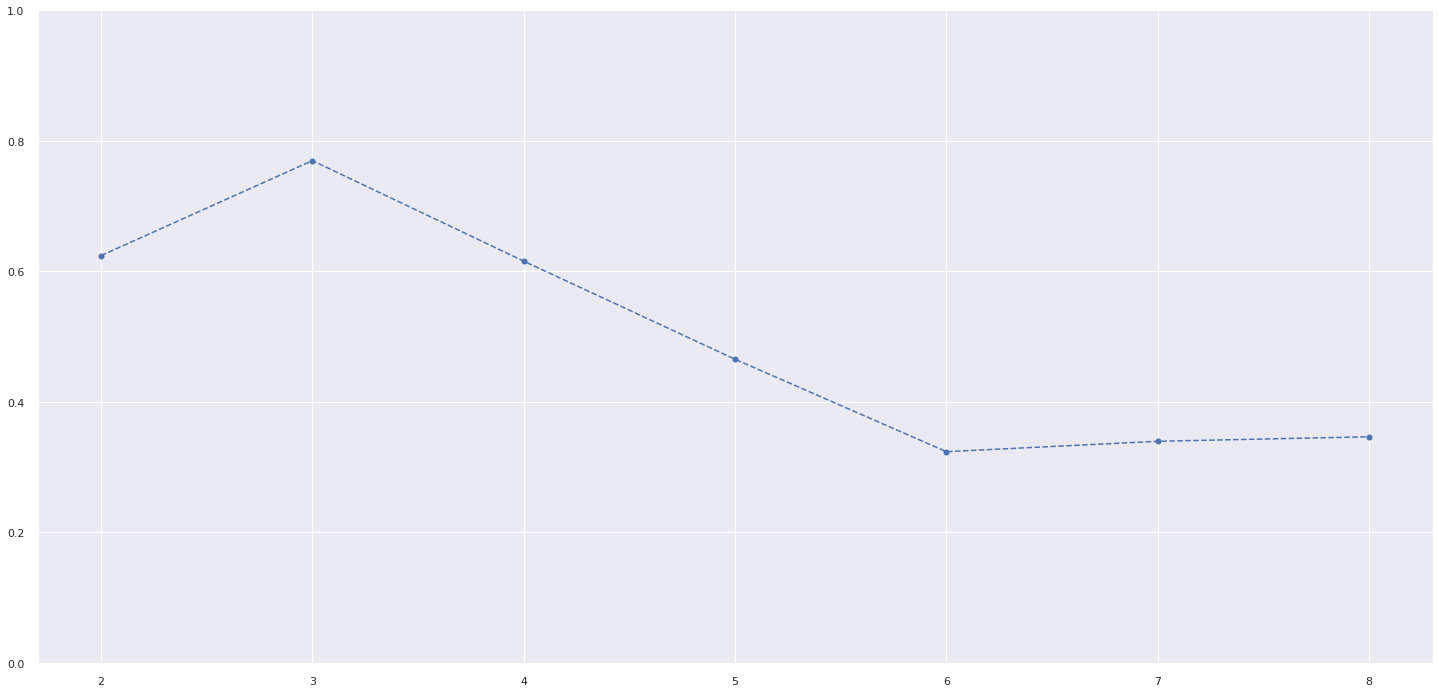

In [ ]:
plt.plot(clusters, silhouette_list, linestyle='--', marker='o', color='b');
plt.ylim(0,1);

# ML training

In [ ]:
k=3

# dataset
X = df_raw[['x1','x2']]

# model definition and fit
kmeans_model=c.KMeans(n_clusters=k).fit(X)

#pred
labels = kmeans_model.predict(X)
df_raw['labels']= labels
df_raw.head()

,x1,x2,class,outliers,outlier_flag,labels
0,-1.831750,2.562770,2,0.409430,0,2
1,0.969462,4.455448,0,0.408038,0,0
2,1.252886,4.581687,0,0.433700,0,0
3,0.593892,4.165395,0,0.401297,0,0
4,1.185826,4.339156,0,0.408202,0,0


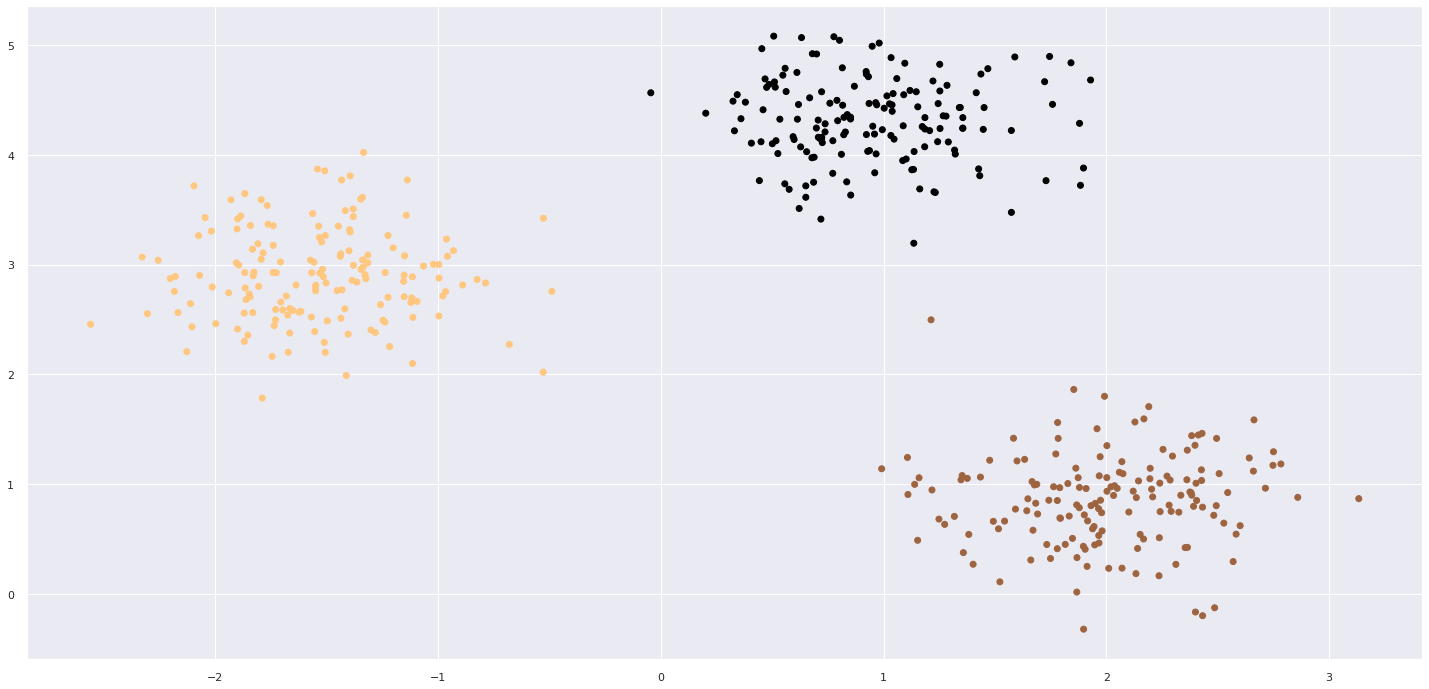

In [ ]:
plt.scatter(df_raw['x1'], df_raw['x2'], c=df_raw['labels'], cmap='copper' );

In [ ]:
# real world 

n_samples = 500
outliers_fractions = 0.05
n_features=5
n_clusters = 3
n_outliers= int(outliers_fractions * n_samples)
n_inliers= n_samples - n_outliers
blobs_params=dict(random_state=0, n_samples=n_inliers, n_features=n_features )
X,y=dt.make_blobs(centers=n_clusters, cluster_std=0.4, **blobs_params )
df=pd.DataFrame(X, columns=['x' + str(i) for i in list(range(1, n_features+1))])
df['class']=y

rng=np.random.RandomState(42)
df_noise=pd.DataFrame(rng.uniform(low=-6,
                     high=6,
                     size=(n_outliers, n_features)), columns=['x' + str(i) for i in list(range(1, n_features+1))])
df_noise['class']=-1

df_raw=pd.concat([df, df_noise], axis=0)
df_raw.head()

,x1,x2,x3,x4,x5,class
0,5.854018,0.443610,1.677489,8.325663,-8.324646,2
1,2.950208,-1.303248,8.071728,9.189679,-2.691505,1
2,5.430296,0.494308,1.719903,8.584423,-8.248566,2
3,2.693963,-1.354786,7.707771,9.154051,-2.282094,1
4,6.085978,0.536174,1.507162,8.188924,-8.767595,2


In [ ]:
# training isolation forest
X=df_raw.drop('class', axis=1)

# model definition
iso_model=en.IsolationForest(n_estimators=100,  n_jobs=-1)

iso_model.fit(X)
pred_scores=-1*iso_model.score_samples(X)

# performance
df_raw['outliers']=pred_scores
df_raw.head()

,x1,x2,x3,x4,x5,class,outliers
0,5.854018,0.443610,1.677489,8.325663,-8.324646,2,0.397619
1,2.950208,-1.303248,8.071728,9.189679,-2.691505,1,0.401984
2,5.430296,0.494308,1.719903,8.584423,-8.248566,2,0.402607
3,2.693963,-1.354786,7.707771,9.154051,-2.282094,1,0.387708
4,6.085978,0.536174,1.507162,8.188924,-8.767595,2,0.405935


In [ ]:
# sacada de um milhao de dolar

In [ ]:
# with outliers

threshold = 0.55

df_raw['outlier_flag']=df_raw['outliers'].apply(lambda x: 1 if x > threshold else 0)
df_raw.shape

(500, 8)

In [ ]:
silhouette_list = []
davies_list = []

clusters=list(range(2,9))
for k in clusters:
    # model definition
    kmeans_model=c.KMeans(n_clusters=k)

    # model Training
    kmeans_model.fit(X)

    # model predict
    labels=kmeans_model.predict(X)

    # model performance
    sil = m.silhouette_score (X, labels)
    dav = m.davies_bouldin_score(X, labels)

    silhouette_list.append(sil)
    davies_list.append(dav)
    print(sil)

0.6261816736065239
0.8256374218832532
0.8330714593067352
0.8348795200399293
0.8369618389345149
0.8371541490797877
0.8342781355746272


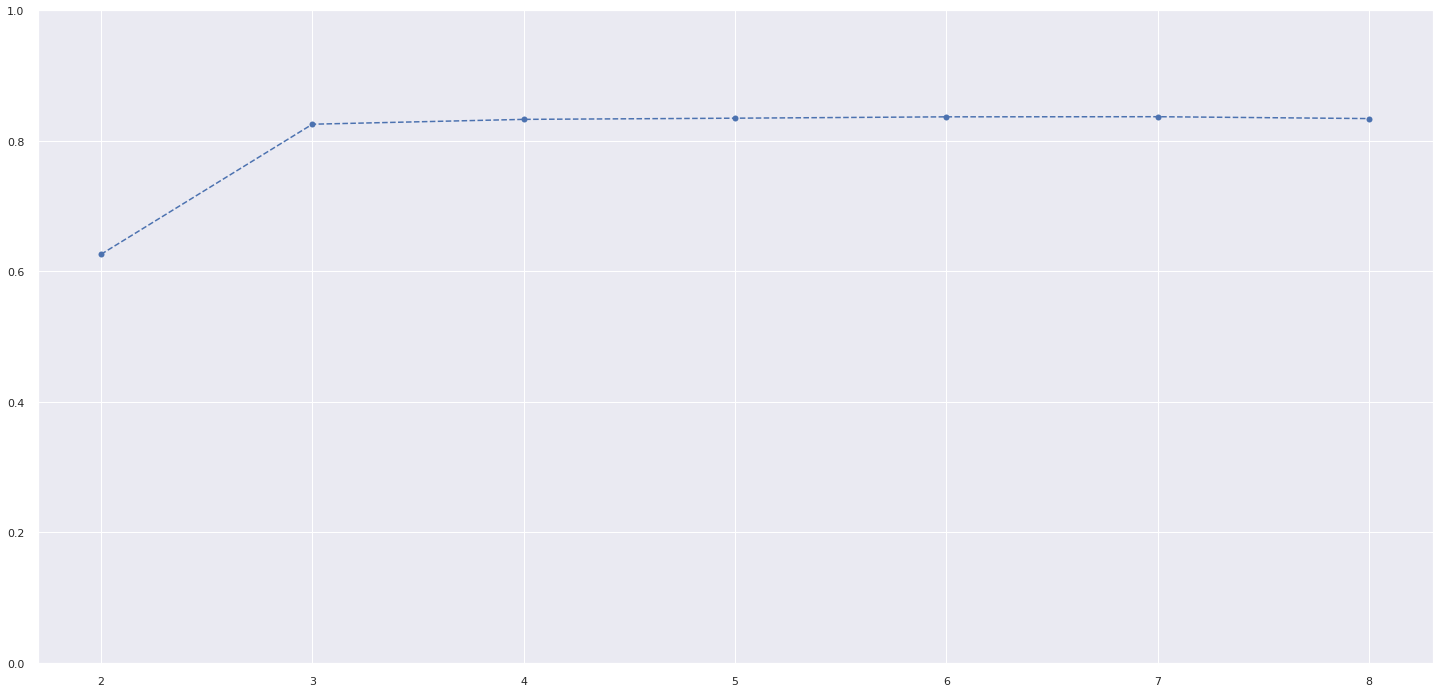

In [ ]:
plt.plot(clusters, silhouette_list, linestyle='--', marker='o', color='b');
plt.ylim(0,1);

In [ ]:
threshold = 0.55

df_raw['outlier_flag']=df_raw['outliers'].apply(lambda x: 1 if x > threshold else 0)

df_raw=df_raw.query('outlier_flag == 0')
df_raw.shape

(475, 8)

In [ ]:
silhouette_list = []
davies_list = []

clusters=list(range(2,9))
for k in clusters:
    # model definition
    kmeans_model=c.KMeans(n_clusters=k)

    # model Training
    kmeans_model.fit(X)

    # model predict
    labels=kmeans_model.predict(X)

    # model performance
    sil = m.silhouette_score (X, labels)
    dav = m.davies_bouldin_score(X, labels)

    silhouette_list.append(sil)
    davies_list.append(dav)
    print(sil)

0.6261816736065239
0.8256374218832532
0.8330714593067352
0.8348795200399293
0.8363889231470465
0.8345651400537725
0.8341122417986696


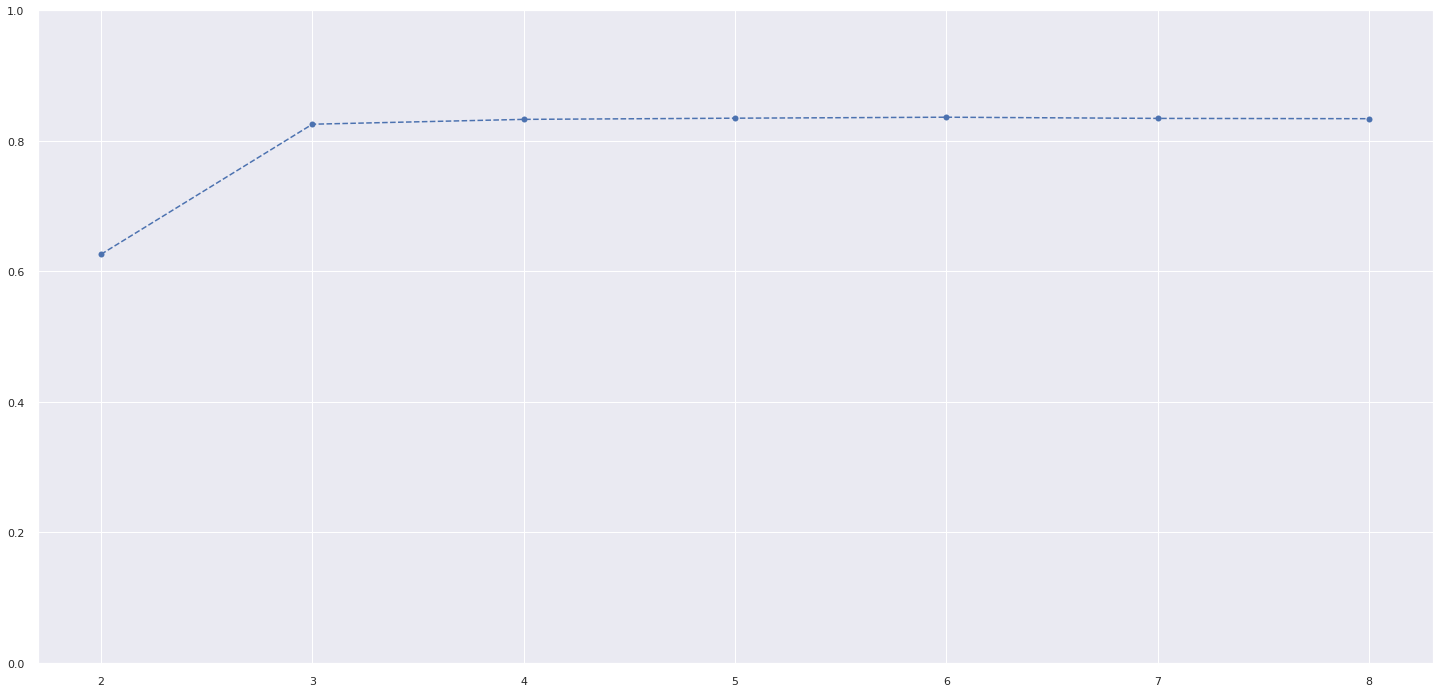

In [ ]:
plt.plot(clusters, silhouette_list, linestyle='--', marker='o', color='b');
plt.ylim(0,1);

- Artificial dataset
    - Changing the space(embedding)
    - Linear changing (PCA)
    - Non linear changing (kernel PCA)
- ML cluster training
    - chech performance

In [ ]:
# exp 1 
from sklearn import datasets as dt
from sklearn import model_selection as ms
from sklearn import decomposition as dc

X,y=dt.make_circles(n_samples=1000, factor=0.3, noise=0.05, random_state=0)
x_train,x_test,y_train,y_test= ms.train_test_split( X, y, stratify=y, random_state=0)

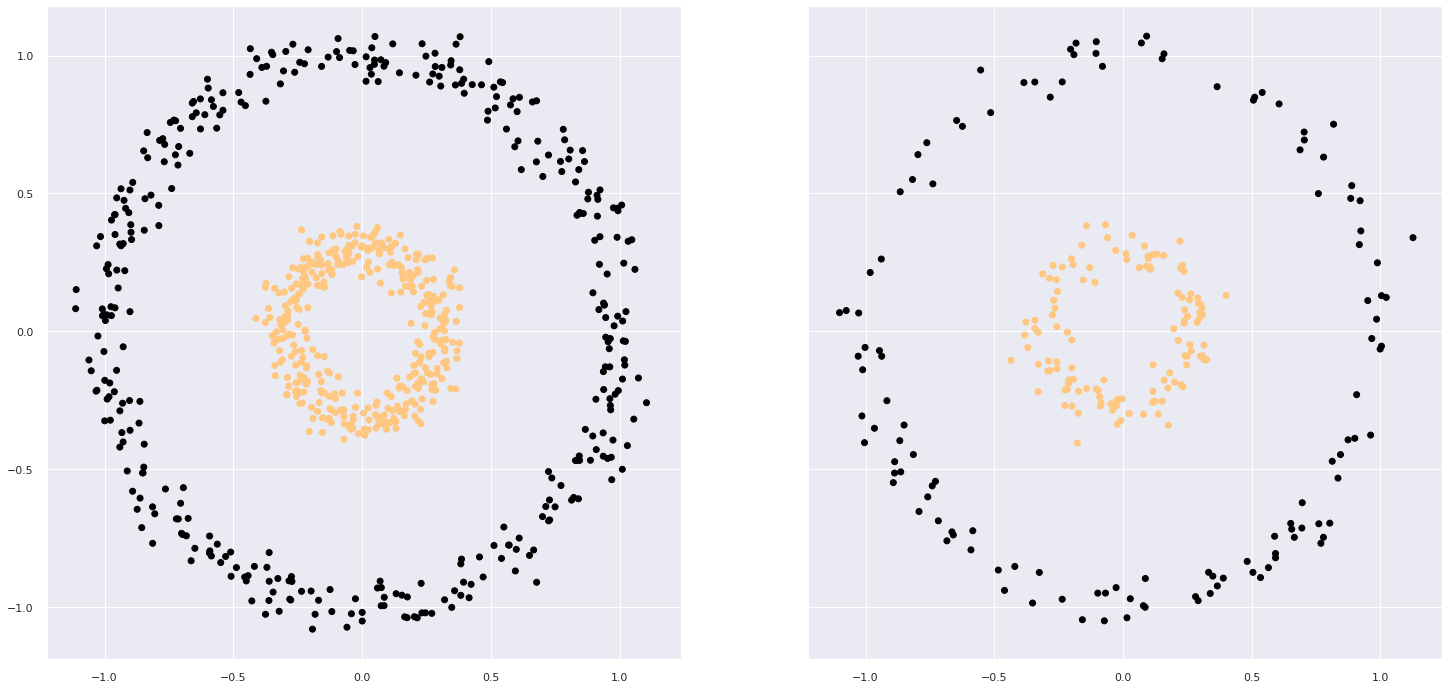

In [ ]:
_, (ax1, ax2)=plt.subplots(ncols=2, sharex=True, sharey=True)
ax1.scatter(x_train[:, 0], x_train[:, 1], c=y_train,cmap='copper');
ax2.scatter(x_test[:, 0], x_test[:, 1], c=y_test,cmap='copper');

In [ ]:
# embedding

# method definition
pca = dc.PCA(n_components=2)
kernel_pca=dc.KernelPCA(n_components=2, kernel='rbf', gamma=10, fit_inverse_transform=True, alpha=0.1)

# embedding application
x_test_pca=pca.fit(x_train).transform(x_test)
x_test_kpca=kernel_pca.fit(x_train).transform(x_test)

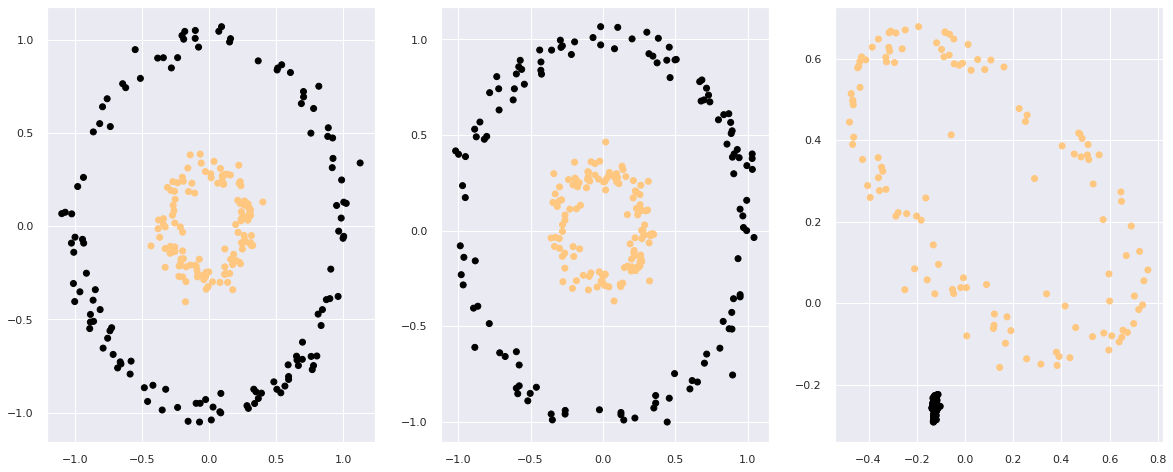

In [ ]:
_, (origin_data_ax, pca_proj_ax, kernel_pca_proj_ax)=plt.subplots( ncols=3, figsize=(20, 8))

origin_data_ax.scatter(x_test[:, 0], x_test[:, 1], c=y_test, cmap='copper');
pca_proj_ax.scatter(x_test_pca[:, 0], x_test_pca[:, 1], c=y_test, cmap='copper');
kernel_pca_proj_ax.scatter(x_test_kpca[:, 0], x_test_kpca[:, 1], c=y_test, cmap='copper');

In [ ]:
# exp 2

In [ ]:
n_samples = 500
outliers_fractions = 0.05

n_features=2
n_clusters = 3

n_outliers= int(outliers_fractions * n_samples)
n_inliers= n_samples - n_outliers

blobs_params=dict(random_state=0, n_samples=n_inliers, n_features=n_features )
X,y=dt.make_blobs(centers=n_clusters, cluster_std=0.4, **blobs_params )

df=pd.DataFrame(X, columns=['x' + str(i) for i in list(range(1, n_features+1))])
df['class']=y

rng=np.random.RandomState(42)
df_noise=pd.DataFrame(rng.uniform(low=-6,
                      high=6,
                      size=(n_outliers, n_features)), columns=['x' + str(i) for i in list(range(1, n_features+1))])
df_noise['class']=-1

df_raw=pd.concat([df, df_noise], axis=0)
df_raw.head()

,x1,x2,class
0,-1.831750,2.562770,2
1,0.969462,4.455448,0
2,1.252886,4.581687,0
3,0.593892,4.165395,0
4,1.185826,4.339156,0


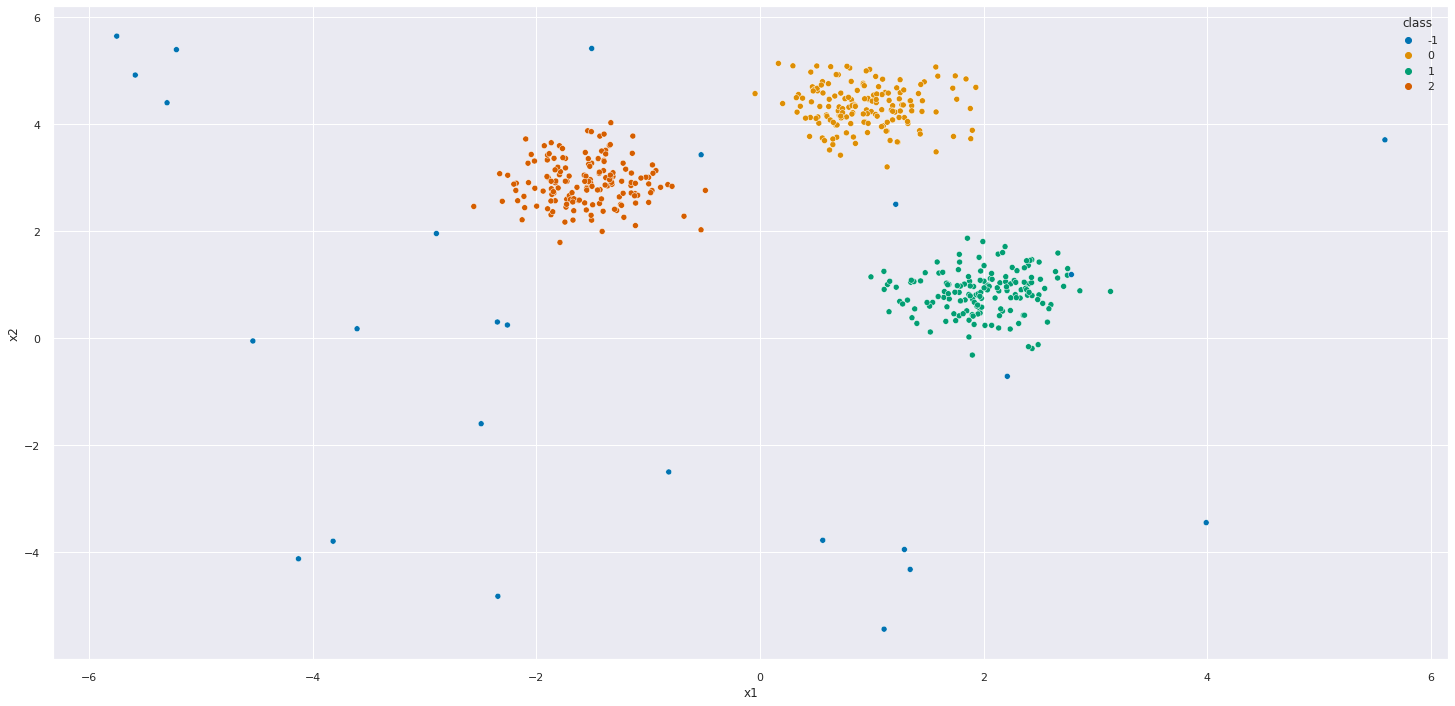

In [ ]:

sns.scatterplot(x=df_raw['x1'], y=df_raw['x2'], hue=df_raw['class'], palette='colorblind', data=df_raw );

In [ ]:
X=df_raw.drop('class', axis=1)
y=df_raw['class']
X.head()

,x1,x2
0,-1.831750,2.562770
1,0.969462,4.455448
2,1.252886,4.581687
3,0.593892,4.165395
4,1.185826,4.339156


## embedding space

In [ ]:
# method definition
pca = dc.PCA(n_components=2)
# kernel_pca=dc.KernelPCA(n_components=2, kernel='rbf', gamma=10, fit_inverse_transform=True, alpha=0.1)
kernel_pca=dc.KernelPCA(n_components=2, kernel='rbf')
# kernel_pca=dc.KernelPCA(n_components=2, kernel='poly', degree=4)
# kernel_pca=dc.KernelPCA(n_components=2, kernel='sigmoid', degree=1)

# embedding application
x_pca=pca.fit_transform(X)
x_kpca=kernel_pca.fit_transform(X)

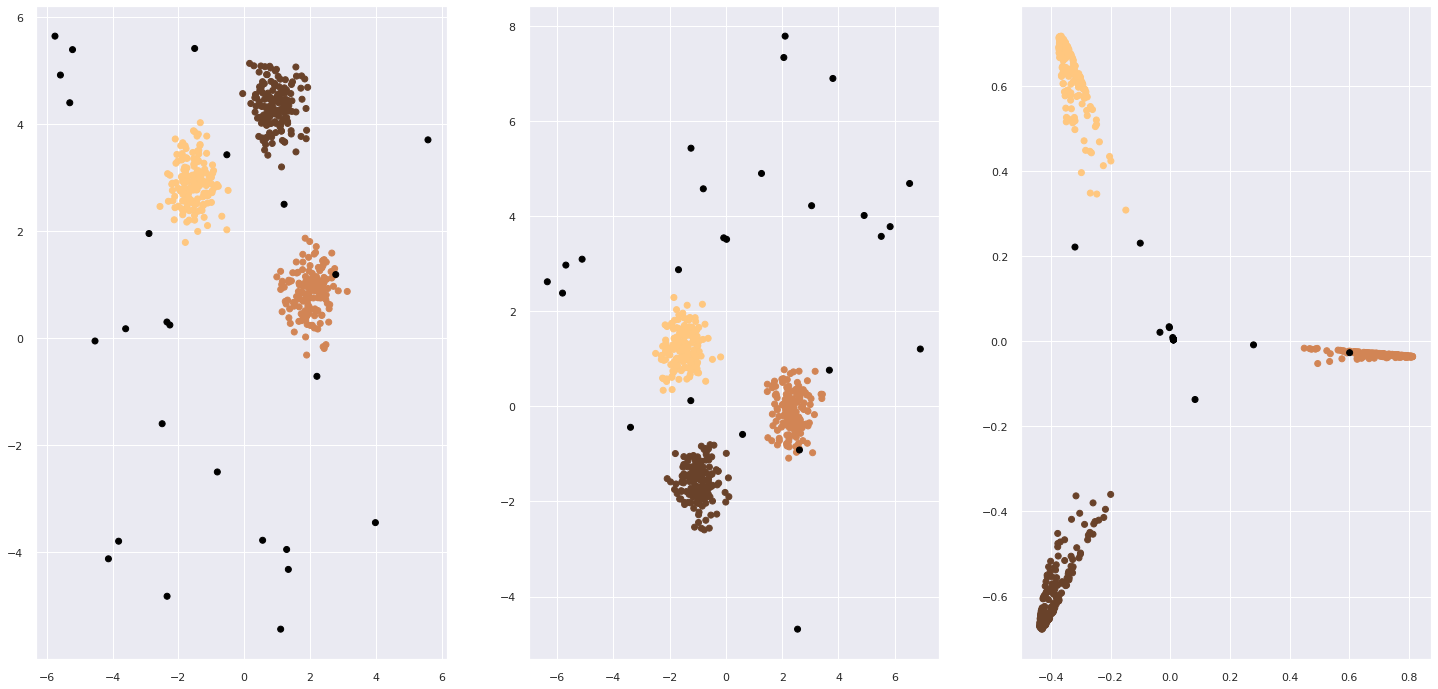

In [ ]:
_, (origin_data_ax, pca_proj_ax, kernel_pca_proj_ax)=plt.subplots( ncols=3)

origin_data_ax.scatter(X['x1'], X['x2'], c=y, cmap='copper');
pca_proj_ax.scatter(x_pca[:, 0], x_pca[:, 1], c=y, cmap='copper');
kernel_pca_proj_ax.scatter(x_kpca[:, 0], x_kpca[:, 1], c=y, cmap='copper');

# Fine tuning


In [ ]:
n_components=2
df_raw=pd.DataFrame(x_kpca, columns=['x' + str(i) for i in list(range(1, n_components+1))])
X=df_raw.copy()
X.shape

(500, 2)

In [ ]:
clusters = list(range(2, 9))
silhouette_list=[]
for k in clusters:
    # model definition and training
    kmeans_model=c.KMeans(n_clusters=k).fit(X)
    
    # predict
    labels=kmeans_model.predict(X)
    df_raw['labels']=labels

    # SS
    sil=m.silhouette_score(X, labels)
    silhouette_list.append(sil)

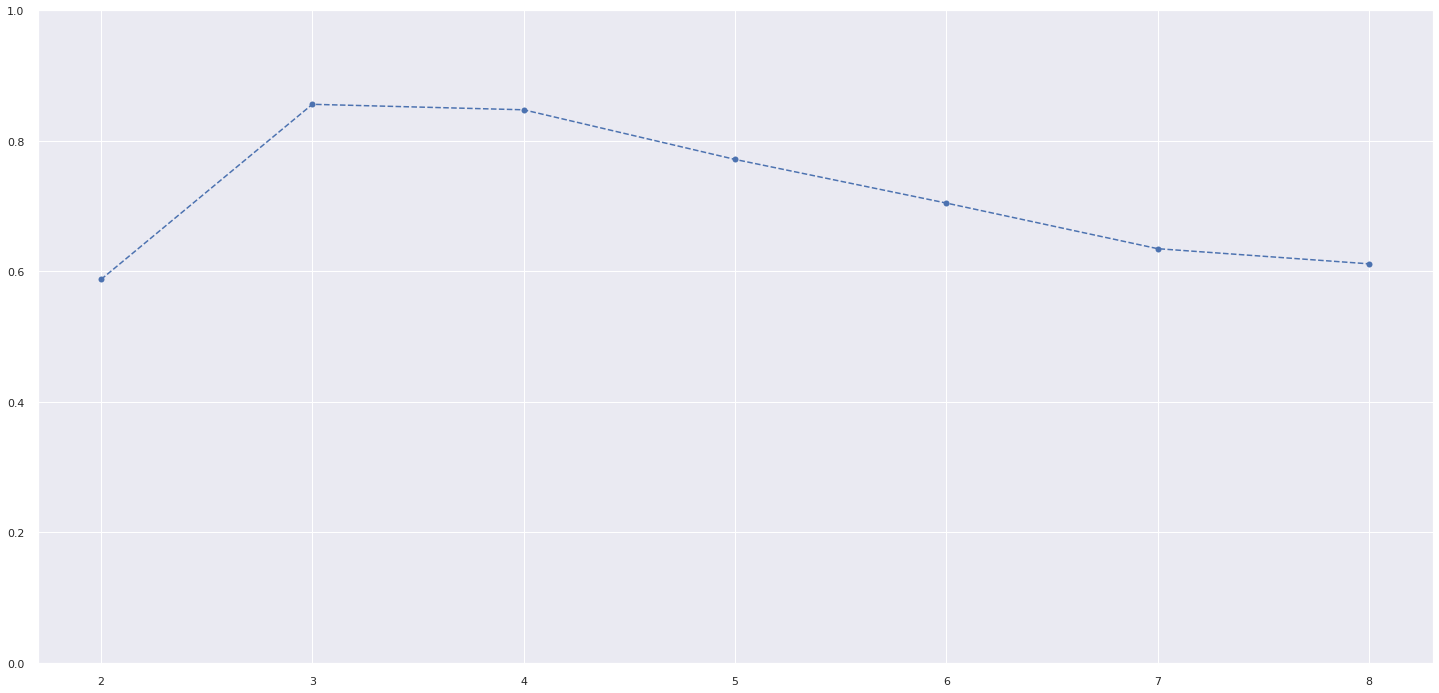

In [ ]:
plt.plot(clusters, silhouette_list, linestyle='--', marker='o', color='b');
plt.ylim([0, 1]);

In [ ]:
clusters = 3
silhouette_list=[]

# model definition and training
kmeans_model=c.KMeans(n_clusters=clusters).fit(X)

# predict
labels=kmeans_model.predict(X)
df_raw['labels']=labels

# SS
sil=m.silhouette_score(X, labels)
print(sil)

0.8561717158893628
